### The purpose of this notebook is to group the agencies into 5 Categories. 

These are the five categories:
1. Public Protection
2. Culture & Recreation	
3. General Administration & Finance	
4. Human Welfare & Neighborhood Development	
5. Public Works, Transportation, and Commerce	

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
oakland = pd.read_csv('oakland_aggregated_data.csv')

In [3]:
oakland

,Department Alias,FY18-19 \nMidcycle Adopted Total,FY19-20 \nBiennial Working Total,FY20-21 \nBiennial Working Total
0,Capital Improvement Projects,66201524.0,102439500.0,92860926.0
1,City Administrator,18912172.0,23722653.0,25178890.0
2,City Attorney,18615221.0,20216139.0,21696825.0
3,City Auditor,2064905.0,2309876.0,2426363.0
4,City Clerk,7259799.0,7523024.0,7386812.0
5,City Council,5522030.0,5987149.0,6121027.0
6,Department of Violence Prevention,1129204.0,1150190.0,1177495.0
7,Economic & Workforce Development,43306380.0,27494517.0,26641463.0
8,Finance Department,777351557.0,842337216.0,875230853.0
9,Fire Department,169822143.0,197596810.0,203370848.0


#### Data Cleaning

In [4]:
###Clean up the data by removing \n

oakland.rename(columns = {'FY18-19 \nMidcycle Adopted Total':'FY18-19 Midcycle Adopted Total', 
                          'FY19-20 \nBiennial Working Total':'FY19-20 Biennial Working Total', 
                          'FY20-21 \nBiennial Working Total':'FY20-21 Biennial Working Total'}, inplace = True) 

In [5]:
oakland

,Department Alias,FY18-19 Midcycle Adopted Total,FY19-20 Biennial Working Total,FY20-21 Biennial Working Total
0,Capital Improvement Projects,66201524.0,102439500.0,92860926.0
1,City Administrator,18912172.0,23722653.0,25178890.0
2,City Attorney,18615221.0,20216139.0,21696825.0
3,City Auditor,2064905.0,2309876.0,2426363.0
4,City Clerk,7259799.0,7523024.0,7386812.0
5,City Council,5522030.0,5987149.0,6121027.0
6,Department of Violence Prevention,1129204.0,1150190.0,1177495.0
7,Economic & Workforce Development,43306380.0,27494517.0,26641463.0
8,Finance Department,777351557.0,842337216.0,875230853.0
9,Fire Department,169822143.0,197596810.0,203370848.0


### Create a new Column titled Agencies by Category

In [10]:

#Create the Public Protection Category
oakland.loc[(oakland['Department Alias'] == 'Race & Equity') | 
            (oakland['Department Alias'] == 'Department of Violence Prevention') |
            (oakland['Department Alias'] == 'Fire Department') |
            (oakland['Department Alias'] == 'Police Commission') |
            (oakland['Department Alias'] == 'Police Department'), 'Agencies by Category'] = 'Public Protection'


#Create the Public Works, Transportation, and Commerce
oakland.loc[(oakland['Department Alias'] == 'Capital Improvement Projects') | 
            (oakland['Department Alias'] == 'Transportation') |
            (oakland['Department Alias'] == 'Economic & Workforce Development') |
            (oakland['Department Alias'] == 'Non') |
            (oakland['Department Alias'] == 'Oakland Public Works'), 'Agencies by Category'] = 'Public Works, Transportation, and Commerce'
    
    
#Create the Human Welfare & Neighborhood Development
oakland.loc[(oakland['Department Alias'] == 'Housing & Community Development') | 
            (oakland['Department Alias'] == 'Human Services'), #called human services instead of human rights commission
             'Agencies by Category'] = 'Human Welfare & Neighborhood Development'

#Create Culture & Recreation
oakland.loc[(oakland['Department Alias'] == 'Oakland Public Library') | 
            (oakland['Department Alias'] == 'Oakland Parks, Recreation & Youth Development'), 
            'Agencies by Category'] = 'Culture & Recreation'
    
        
#Create General Administration & Finance
oakland.loc[(oakland['Department Alias'] == 'City Council') | 
            (oakland['Department Alias'] == 'City Administrator') |
            (oakland['Department Alias'] == 'City Attorney') |
            (oakland['Department Alias'] == 'City Auditor') |
            (oakland['Department Alias'] == 'City Clerk') |
            (oakland['Department Alias'] == 'Planning & Building') |
            (oakland['Department Alias'] == 'Public Ethics Commission') |
            (oakland['Department Alias'] == 'Finance Department') |
            (oakland['Department Alias'] == 'Human Resources Management Department') |
            (oakland['Department Alias'] == 'Information Technology') |
            (oakland['Department Alias'] == 'Mayor'),
            'Agencies by Category'] = 'General Administration & Finance'


    
    
    
    
    
    
    
    
    
    
    

In [11]:
oakland

,Department Alias,FY18-19 Midcycle Adopted Total,FY19-20 Biennial Working Total,FY20-21 Biennial Working Total,Agencies by Category
0,Capital Improvement Projects,66201524.0,102439500.0,92860926.0,"Public Works, Transportation, and Commerce"
1,City Administrator,18912172.0,23722653.0,25178890.0,General Administration & Finance
2,City Attorney,18615221.0,20216139.0,21696825.0,General Administration & Finance
3,City Auditor,2064905.0,2309876.0,2426363.0,General Administration & Finance
4,City Clerk,7259799.0,7523024.0,7386812.0,General Administration & Finance
5,City Council,5522030.0,5987149.0,6121027.0,General Administration & Finance
6,Department of Violence Prevention,1129204.0,1150190.0,1177495.0,Public Protection
7,Economic & Workforce Development,43306380.0,27494517.0,26641463.0,"Public Works, Transportation, and Commerce"
8,Finance Department,777351557.0,842337216.0,875230853.0,General Administration & Finance
9,Fire Department,169822143.0,197596810.0,203370848.0,Public Protection


### Aggregation of the data into the Agency Categories. This is done by summation.

In [12]:
agencies = oakland.groupby(['Agencies by Category'])[['FY18-19 Midcycle Adopted Total', 
                                                 'FY19-20 Biennial Working Total',
                                                 'FY20-21 Biennial Working Total']].agg('sum')

In [15]:
agencies

,FY18-19 Midcycle Adopted Total,FY19-20 Biennial Working Total,FY20-21 Biennial Working Total
Agencies by Category,,,
Culture & Recreation,1.090949e+08,1.200622e+08,1.279472e+08
General Administration & Finance,9.778795e+08,1.080197e+09,1.114219e+09
Human Welfare & Neighborhood Development,2.548599e+08,3.209873e+08,2.886949e+08
Public Protection,4.747248e+08,5.317411e+08,5.492250e+08
"Public Works, Transportation, and Commerce",1.151739e+09,1.259457e+09,1.224018e+09


In [16]:
agencies.to_csv('oak_agencies.csv')

In [17]:
agencies.index

Index(['Culture & Recreation', 'General Administration & Finance',
       'Human Welfare & Neighborhood Development', 'Public Protection',
       'Public Works, Transportation, and Commerce'],
      dtype='object', name='Agencies by Category')

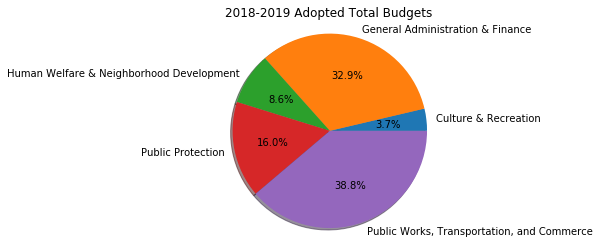

In [22]:
#2018-2019
amt = agencies['FY18-19 Midcycle Adopted Total']
labels = agencies.index
fig, ax1 = plt.subplots()
ax1.pie(amt, labels=labels, shadow=True, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('2018-2019 Adopted Total Budgets')
plt.show()

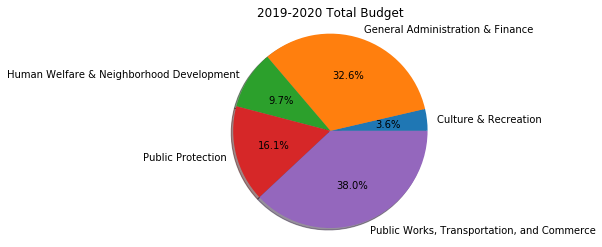

In [24]:
#2019-2020
amt = agencies['FY19-20 Biennial Working Total']
labels = agencies.index
fig, ax1 = plt.subplots()
ax1.pie(amt, labels=labels, shadow=True, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('2019-2020 Total Budget')
plt.show()

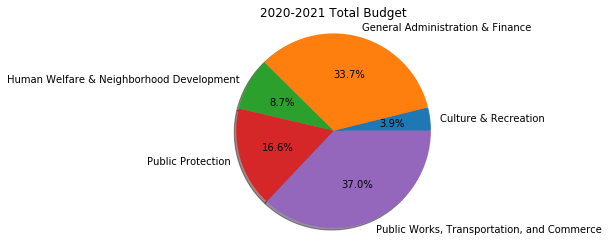

In [26]:
#2019-2020
amt = agencies['FY20-21 Biennial Working Total']
labels = agencies.index
fig, ax1 = plt.subplots()
ax1.pie(amt, labels=labels, shadow=True, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('2020-2021 Total Budget')
plt.show()